In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("DATA/over_threshold_data",sep="\t", header=None) 
df.columns = ["year", "country", "oth"]

print('Percentage of missing data')
print((df.isnull().sum() / len(df))*100)

Percentage of missing data
year       0.0
country    0.0
oth        0.0
dtype: float64


In [9]:
df

year               country  oth
0    1840                Kuwait    1
1    1844                Kuwait    1
2    1846                Kuwait    1
3    1847                Kuwait    1
4    1850                Kuwait    1
..    ...                   ...  ...
174  2012  United Arab Emirates    3
175  2013                 Qatar    1
176  2013                Kuwait    2
177  2013               Bahrain    1
178  2013  United Arab Emirates    1

[179 rows x 3 columns]

In [10]:
places = np.unique(df["country"])
print(places.size)
places

6


array(['Bahrain', 'Iraq', 'Kuwait', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates'], dtype=object)

In [16]:
cont = pd.DataFrame(columns = ["oth", "country"])
#std_q2.columns = ["std", "key"]
cont["country"] = places
count = []
for p in places:
    count.append(np.sum(df[df["country"] == p]["oth"]))

cont["oth"] = count

cont

oth               country
0   29               Bahrain
1   11                  Iraq
2  125                Kuwait
3   37                 Qatar
4    5          Saudi Arabia
5   67  United Arab Emirates

In [18]:
top = cont.sort_values(by=['oth'], ascending=False).head(30)["country"]
bot = cont.sort_values(by=['oth'], ascending=True).head(30)["country"]
tips = list(top) + list(bot)
top

2                  Kuwait
5    United Arab Emirates
3                   Qatar
0                 Bahrain
1                    Iraq
4            Saudi Arabia
Name: country, dtype: object

In [19]:
df[df["country"].isin(top)]

year               country  oth
0    1840                Kuwait    1
1    1844                Kuwait    1
2    1846                Kuwait    1
3    1847                Kuwait    1
4    1850                Kuwait    1
..    ...                   ...  ...
174  2012  United Arab Emirates    3
175  2013                 Qatar    1
176  2013                Kuwait    2
177  2013               Bahrain    1
178  2013  United Arab Emirates    1

[179 rows x 3 columns]

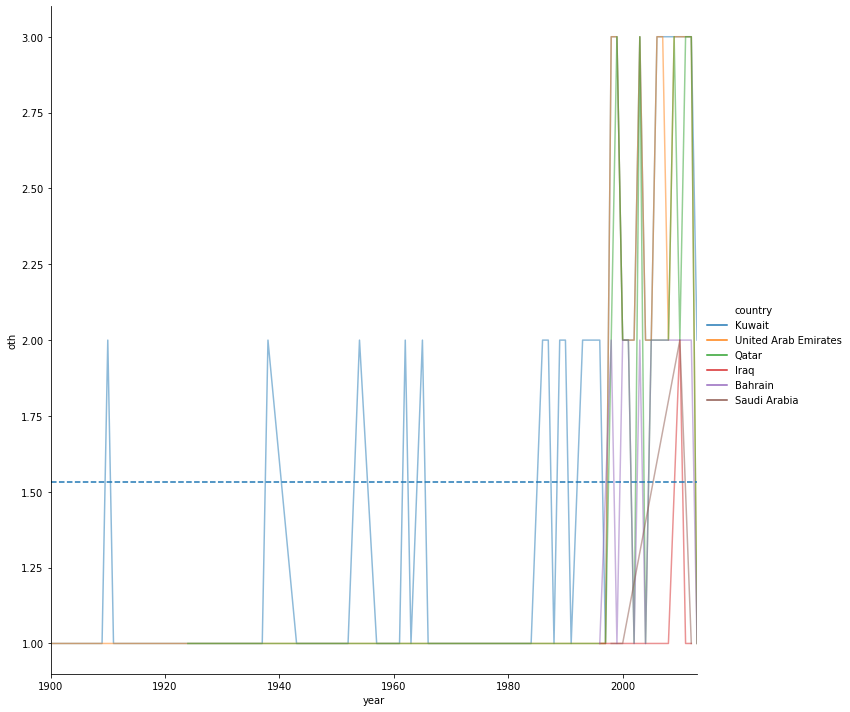

In [23]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
m = df[df["country"].isin(top)]["oth"].mean(axis=0)
#m = df_q3["avg"].mean(axis=0)
g = sns.relplot(x="year", y="oth", hue="country", kind="line", ci=None, data=df[df["country"].isin(top)], height=10, alpha=0.5).set(xlim=(1900,2013))
#g = sns.relplot(x="year", y="avg", hue="key", kind="line", ci=None, data=df_q3, height=10, alpha=0.5).set(xlim=(1900,2013))
ax0 = g.ax
ax0.axhline(m, ls='--')
plt.show()

In [24]:
g.savefig("q6.png")